# Recognition of human faces Excercise 1 Report


Data taken Extended Yale face database B (cropped)
http://vision.ucsd.edu/~iskwak/ExtYaleDatabase/ExtYaleB.html

38 different persons, each photographed in several conditions:
    Intensity of illumination
    Position of light source
    But only one pose, unlike in the original non-cropped database
There are also some non-cropped images
    You are allowed to ignore them

Tasks
- 0 points: install the required tools (python, R, Matlab) and download the data. 
- 1 point: Read articles or web pages about face recognition. You may try searching for “face recognition techniques”. Some example papers about the subject: www.mdpi.com/2073431X/5/4/21/pdf , https://pdfs.semanticscholar.org/d90d/911f98f40a480074bc23ccd57a01d37c8580.pdf, https://www.researchgate.net/profile/Hamid_Arabnia/publication/220635738_A_Survey_of_Face _Recognition_Techniques/links/00b49526665d9eab4f000000/A-Survey-of-Face-RecognitionTechniques.pdf. There is also a very easy to read web page http://colah.github.io/posts/2014-10Visualizing-MNIST/, although it is for recognizing hand-written digits. o To get points from this step, you should write 1-3 paragraphs about a freely selected technique. Neural networks are not allowed because they are the subject of exercise 2.
- 1 point: Feature extraction and preprocessing. Report what you did. You may select the method freely, including using the raw pixel data as feature vectors, scaling to lower resolution, using PCA (eigenfaces) etc. Methods covered in the lectures (or in the course Data Analysis and Knowledge Discovery) are preferred. If you use other methods please include references / links describing the method.
- 1 point: Classification using methods other than neural networks. Among the possibilities are naïve Bayes, k-NN, logistic regression, SVM, others covered in the lectures. 
- 1 point: Report the overall classification accuracy, confusion matrix and a few example images of failed classifications 
o The 38x38 confusion matrix may be too big to display in a numeric form. Consider using a color-coded image instead. There are easy-to-use tools for that in python. o For classification accuracy, you might also try reporting results separately for different lighting conditions to see whether images taken under certain conditions are harder to recognize that others. 
 
If you have a computer with very little memory or a slow processor, you can do the exercise with only a subset of the images. In this case you should remove pictures randomly. It is forbidden to intentionally select a subset that is easy to recognize. Be prepared to show your selection code if you do not use all images in your work.

## PART 1

### Face Recognition Techniques


Face recognition system has three basic stages. The first stage is face detection which decides and locate if the image contains a face or not. This stage is affected by the illumination, position, facial expression, orientation, morphological criteria of the image and as a result, it decreases rate of face detection.  The second stage is feature extraction. Feature extraction extracts feature vectors called the signature from the detected face. This stage verifies the uniqueness of the face and the discriminating factor between two different individual faces. The final stage is face recognition which involves authentication which compares a face with other to approve the requested identity and identification which compares a face with several other faces to find the identity of the among several other possibilities.  [1]

There are three basic approaches, according to the manner of treating the face images in 2D images. The Global approach which uses the entire face as an input data. There is no need to extract characteristic points or facial points. The face image is represented as matrix of pixels which will then be transformed to pixel vectors. This approach is further divided in two linear and nonlinear approach. Local approach is the second approach which considers only some features or areas of the face that are classified according to well-defined statistics. This approach is further divided in two. Interest-point which detects the point of interest and extract features localized to this point and local appearance based which divides the face in to small patches and extracts local characteristics from them. The third approach Is the hybrid approach which uses both the global and local approach simultaneously. It also uses statistics models. [1]

Eigenface is one of the popular approach in face recognition. Eigenface is one of the global approach which uses the linear technique. This approached uses a linear projection image data inputs from a relatively higher dimension to lower dimension. It is based on Principal Component Analysis (PCA) technique. [1] The main idea behind PCA approach to is to find the main components of this faces. It builds M eigenvectors for NxM matrix, which are ordered from highest to lower where the largest eigenvalue is associated with the vector that finds the highest variance in the image. Each examples(individual’s) face then be described by a linear combination of these eigenvectors. To make classification, we need to find eigenface with the smallest Euclidian distance from the input face. To do that we need to transform the input image to a lower dimension which will be the principal component. [2] Generally linear projection has some drawbacks, first the non-convex face variation can’t be preserves second using Euclidian distance to compare vectors of pixels of linear space are not an efficient way of classifying face from non-face of an individual. As a result, the detection and recognition of these methods are unsatisfactory. [1]
References
 
 
1.	www.mdpi.com/2073-431X/5/4/21/pdf 
2.	https://pdfs.semanticscholar.org/d90d/911f98f40a480074bc23ccd57a01d37c8580.pdf


## PART 2

## Introduction

In this exercise we use Yele face dataset to investigate human face recognition. The image data can be found from http://vision.ucsd.edu/~iskwak/ExtYaleDatabase/ExtYaleB.html. The dataset contains images of 38 different persons. Each person is photographed in several conditions of intensity of illumination, position of light etc. We used the cropped version of the dataset and ignored the uncropped images. The images are cropped and resized 168x192. There are about 57 different conditions for each person when we ignore the uncropped images. Therefor we will have 2166 different rows in this dataset and 168x192 = 32256 features (pixels). Thus, each image is represented with 32256 diffrent features.
The goal of this exercise is:
    •	to use one of the feature extraction methods, in this case PCA(eigenfaces) and reduce the features with only relevant           representation of the image
    •	Use some classification methods and select the best method for this data. Cross Validation method is used in the model           selection process
    •	And finally report the classification accuracy, confusion matrix and show some failed or misclassified examples.


### Import all the required libraries

In [5]:
from collections import OrderedDict
import os
import numpy as np
import pandas as pd
from orderedset import OrderedSet
import imageio
import matplotlib.pyplot as plt
from PIL import Image
import scipy.misc
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import display, HTML
from sklearn.preprocessing import LabelEncoder

import os
os.getcwd()#check the working dir


'C:\\Users\\Ashenafi\\Desktop\\ML&PR'

### Next all the helper fuctions to change the given pic's pixel values to pandas data frame


In [ ]:
All the credit goes to the writer of the code below, it simplifies the exercise at a great extent.

In [7]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Mon Mar 12 21:14:39 2018

@author: mika

This file contains an example implementation of how the images can be read
in python.

I give no guarantees of the implementation working properly.
"""
from collections import OrderedDict
import os
import numpy as np
import pandas as pd
import imageio
from orderedset import OrderedSet
def get_croppedyale_as_df():
    """ Get a subset of the cropped Yale images as one 2D array (Pandas DataFrame).

    All 'Ambient' images are discarded. Also, if there are persons that have not
    been photographed in certain illumination conditions, none of the images taken
    in those conditions are included in the result.

    Each row of the output table (Pandas data frame) contains one image represented
    as a linear array.
    """
    pics, all_suffixes, suffixes = load_images_croppedyale()
    feature_matrix, person_names, full_names, resolution = images_to_array(pics, suffixes)
    name_suffixes = [full_name[1] for full_name in full_names]
    feature_matrix = pd.DataFrame(feature_matrix)
    feature_matrix.loc[:, 'person'] = person_names
    feature_matrix.loc[:, 'pic_name'] = name_suffixes
    feature_matrix = feature_matrix.set_index(['person', 'pic_name'])
    return feature_matrix, resolution
def load_images_croppedyale():
    """ Read images from the cropped Yale data set.

    The implementation is heavily tied to the known directory structure of the data set.
    Also, pictures labeled 'Ambient' are discarded because some of them have not been
    cropped and are not the same size as the other images.

    Returns:
    1) The loaded pictures as an ordered dictionary of ordered dictionaries.
    The keys of the first-level dictionary are folder names such as 'yaleB10', each name
    corresponding to one person. In the second-level dictionaries the keys are strings
    describing the pose and the illumination, as extracted from the file names.
    2) All keys appearing in any of the second-level dictionaries, as an OrderedSet.
    3) All keys appearing in all second-level dictionaries, as an OrderedSet.
    """
    orig_folder = os.getcwd()
#     orig_folder = Data_Dir= r'C:\Users\Ashenafi\Desktop\ML&PR\CroppedYale'
    try:
        os.chdir('CroppedYale')
        subdirs = sorted(os.listdir())
        pics = OrderedDict()
        u_fname_suffixes, i_fname_suffixes = OrderedSet(), OrderedSet()
        image_resolution = None
        first_iter = True
        for subdir in subdirs: # Iterate over all folders (persons)
            pics[subdir] = OrderedDict()
            os.chdir(subdir)
            file_names = [x for x in os.listdir() if x.endswith('.pgm') and 'Ambient' not in x]
            current_suffixes = sorted(x[len(subdir) + 1 : -4] for x in file_names)
            for fname_suffix in current_suffixes: # Iterate over files (images)
                fname = subdir + '_' + fname_suffix + '.pgm'
                pic = imageio.imread(fname)
                pics[subdir][fname_suffix] = pic
                if image_resolution is None:
                    image_resolution = [len(pic[0]), len(pic)]
                elif image_resolution != [len(pic[0]), len(pic)]:
                    print('Warning: input images have different sizes.')
            u_fname_suffixes = u_fname_suffixes.union(current_suffixes)
            if first_iter:
                i_fname_suffixes, first_iter = u_fname_suffixes, False
            else:
                i_fname_suffixes = i_fname_suffixes.intersection(current_suffixes)
            os.chdir('..')
        return pics, u_fname_suffixes, i_fname_suffixes
    finally:
        os.chdir(orig_folder)
def images_to_array(pics, included_suffixes):
    """ Convert the given pictures to a numpy array.

    Each row of the returned array is a linear representation of one image.
    Pictures whose properties do not match any of included_suffixes are not included.
    It is also checked that all images have the same resolution - if not, an
    Exception is raised.

    In addition to the array of pictures, also a list of all labels (person
    'names') and suffixes (lighting conditions) is returned, as well as the
    resolution of the images.
    """
    x_res, y_res = -1, -1
    feature_matrix = None
    person_names = []
    full_pic_names = []
    # Get the resolution and the names of the included pictures. For
    # better performance we defer the creation of the feature matrix.
    for person_name in pics.keys():
        for pic_name in included_suffixes:
            current_pic = pics[person_name][pic_name]
            xpix, ypix = len(current_pic[0]), len(current_pic)
            if x_res < 0: # We are processing the first image
                x_res, y_res = xpix, ypix
            else:
                if (x_res, y_res) != (xpix, ypix):
                    raise Exception('All images must be of the same size.')
            person_names += [person_name]
            full_pic_names += [(person_name, pic_name)]
    # Get the pictures into the feature matrix. Pixel intensities are
    # scaled from 0...255 to the range [0, 1].
    pic_arrays = [np.array((pics[s[0]][s[1]] / 255).ravel()) for s in full_pic_names]
    feature_matrix = np.vstack(pic_arrays)
    return feature_matrix, np.array(person_names), np.array(full_pic_names), [x_res, y_res]
        

In [8]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Wed Mar 28 22:39:40 2018

@author: mika

This is a simple example where we read the images as a DataFrame using
get_croppedyale_as_df() and then select some rows of the DataFrame based
on person 'names' or lighting conditions.
"""

# import read_yale

images, resolution = get_croppedyale_as_df()
# The data frame uses a MultiIndex to store the person 'names' and lighting
# conditions. Here we briefly demonstrate using the data frame.

# Get the names of the persons
row_persons = images.index.get_level_values('person')
# Get all images of 'yaleB10'
# rows_include = (row_persons == 'yaleB10')
# pics_B10 = images[rows_include]
# print(pics_B10) # there are over 30 000 columns so results are not pretty..
# Get all images under conditions "P00A-130E+20"
row_conds = images.index.get_level_values('pic_name')
rows_include = (row_conds == row_conds.all())
pics_2 = images[rows_include]
print(pics_2)

                         0         1         2         3         4      \
person  pic_name                                                         
yaleB01 P00A-130E+20  0.023529  0.027451  0.031373  0.031373  0.023529   
yaleB02 P00A-130E+20  0.023529  0.023529  0.023529  0.027451  0.027451   
yaleB03 P00A-130E+20  0.027451  0.027451  0.031373  0.027451  0.027451   
yaleB04 P00A-130E+20  0.023529  0.023529  0.023529  0.015686  0.015686   
yaleB05 P00A-130E+20  0.000000  0.000000  0.000000  0.003922  0.000000   
yaleB06 P00A-130E+20  0.027451  0.031373  0.031373  0.035294  0.035294   
yaleB07 P00A-130E+20  0.027451  0.027451  0.027451  0.027451  0.031373   
yaleB08 P00A-130E+20  0.011765  0.011765  0.011765  0.015686  0.015686   
yaleB09 P00A-130E+20  0.011765  0.015686  0.019608  0.023529  0.023529   
yaleB10 P00A-130E+20  0.039216  0.039216  0.043137  0.039216  0.035294   
yaleB11 P00A-130E+20  0.039216  0.035294  0.035294  0.039216  0.039216   
yaleB12 P00A-130E+20  0.027451  0.0313

In [10]:
# This will find the rest of the data with the other condition than the above
rows_include_3 = (row_conds != row_conds.all())
pics_3 = images[rows_include_3]
print(pics_3)

                         0         1         2         3         4      \
person  pic_name                                                         
yaleB01 P00A+000E+00  0.313725  0.313725  0.329412  0.352941  0.360784   
        P00A+000E+20  0.368627  0.368627  0.376471  0.400000  0.427451   
        P00A+000E+45  0.231373  0.258824  0.301961  0.337255  0.360784   
        P00A+000E+90  0.062745  0.070588  0.086275  0.090196  0.109804   
        P00A+000E-20  0.270588  0.278431  0.301961  0.309804  0.309804   
        P00A+000E-35  0.207843  0.203922  0.219608  0.227451  0.231373   
        P00A+005E+10  0.415686  0.419608  0.454902  0.482353  0.482353   
        P00A+005E-10  0.368627  0.376471  0.407843  0.411765  0.423529   
        P00A+010E+00  0.466667  0.466667  0.509804  0.529412  0.533333   
        P00A+010E-20  0.352941  0.352941  0.364706  0.380392  0.388235   
        P00A+015E+20  0.466667  0.470588  0.486275  0.513725  0.533333   
        P00A+020E+10  0.482353  0.4862

Find a data frame with all different condition with one condition assign that to pics_2, then find the other conditions for all and assign it to pics_3. Then merge both to get all the data.

38 + 2128 = 2166 (which is 38*57 = 2166). Each person has 57 different kind of pictures!


In [11]:
print('Length of df with pic name P00A-130E+20 : ' , len(pics_2)) 
print ('Length of df with pic name other than P00A-130E+20: ', len(pics_3))

Length of df with pic name P00A-130E+20 :  38
Length of df with pic name other than P00A-130E+20:  2128


In [12]:
#Merging those two data frames gives us the whole data set as data frame
frames = [pics_2,pics_3]
result = pd.concat(frames)

In [13]:
# incude person and pic_name as col and re-index the df
result =result.reset_index(level=['person', 'pic_name']) 
len(result)

2166

In [14]:
result.head()

,person,pic_name,0,1,2,3,4,5,6,7,...,32246,32247,32248,32249,32250,32251,32252,32253,32254,32255
0,yaleB01,P00A-130E+20,0.023529,0.027451,0.031373,0.031373,0.023529,0.023529,0.023529,0.027451,...,0.211765,0.321569,0.309804,0.156863,0.172549,0.211765,0.184314,0.298039,0.372549,0.458824
1,yaleB02,P00A-130E+20,0.023529,0.023529,0.023529,0.027451,0.027451,0.027451,0.027451,0.027451,...,0.058824,0.058824,0.062745,0.058824,0.058824,0.062745,0.066667,0.070588,0.074510,0.078431
2,yaleB03,P00A-130E+20,0.027451,0.027451,0.031373,0.027451,0.027451,0.027451,0.027451,0.031373,...,0.125490,0.160784,0.149020,0.160784,0.207843,0.266667,0.317647,0.313725,0.282353,0.278431
3,yaleB04,P00A-130E+20,0.023529,0.023529,0.023529,0.015686,0.015686,0.019608,0.015686,0.015686,...,0.215686,0.207843,0.168627,0.188235,0.211765,0.235294,0.282353,0.227451,0.250980,0.274510
4,yaleB05,P00A-130E+20,0.000000,0.000000,0.000000,0.003922,0.000000,0.003922,0.003922,0.000000,...,0.741176,0.533333,0.364706,0.407843,0.403922,0.435294,0.494118,0.588235,0.639216,0.674510


#### Assign the person as class and the rest as features


let us ignore the pic_name col for now 

In [16]:
df_class= result.loc[:,'person' ] 
df_features= result.iloc[:, 2: ]

In [17]:
df_features.head()

,0,1,2,3,4,5,6,7,8,9,...,32246,32247,32248,32249,32250,32251,32252,32253,32254,32255
0,0.023529,0.027451,0.031373,0.031373,0.023529,0.023529,0.023529,0.027451,0.023529,0.027451,...,0.211765,0.321569,0.309804,0.156863,0.172549,0.211765,0.184314,0.298039,0.372549,0.458824
1,0.023529,0.023529,0.023529,0.027451,0.027451,0.027451,0.027451,0.027451,0.027451,0.027451,...,0.058824,0.058824,0.062745,0.058824,0.058824,0.062745,0.066667,0.070588,0.074510,0.078431
2,0.027451,0.027451,0.031373,0.027451,0.027451,0.027451,0.027451,0.031373,0.027451,0.027451,...,0.125490,0.160784,0.149020,0.160784,0.207843,0.266667,0.317647,0.313725,0.282353,0.278431
3,0.023529,0.023529,0.023529,0.015686,0.015686,0.019608,0.015686,0.015686,0.015686,0.019608,...,0.215686,0.207843,0.168627,0.188235,0.211765,0.235294,0.282353,0.227451,0.250980,0.274510
4,0.000000,0.000000,0.000000,0.003922,0.000000,0.003922,0.003922,0.000000,0.000000,0.000000,...,0.741176,0.533333,0.364706,0.407843,0.403922,0.435294,0.494118,0.588235,0.639216,0.674510


In [18]:
df_class.head()

0    yaleB01
1    yaleB02
2    yaleB03
3    yaleB04
4    yaleB05
Name: person, dtype: object

In [19]:
df_class.shape, df_features.shape

((2166,), (2166, 32256))

### Feature extraction and preprocessing


### PCA (eigenfaces)

PCA is used as feature extraction method, According to PCA 90% of the variance is on 5-10% of the dimension.[2]

In [20]:
# According to PCA 90% of the variance is on 5-10% of the diamension
from sklearn.decomposition import PCA
pca = PCA(n_components=896) # for memory perpose i took a resonable n_componets = 896 which is (168/6 * 192/6)
pca.fit(df_features)
pca_30 = pca.transform(df_features)
pca_30.shape

(2166, 896)

In [21]:
#we can verify the variance of each PC..as we can see the first PC =36%, second = 34% ....
import numpy as np
from sklearn.decomposition import PCA
print(pca.explained_variance_ratio_)

[  3.62699172e-01   3.48764423e-01   4.87821421e-02   2.78514982e-02
   1.49207716e-02   1.38279486e-02   1.03208609e-02   9.63410931e-03
   7.58212759e-03   6.91921831e-03   6.66255202e-03   5.22520991e-03
   4.91186228e-03   4.56133142e-03   4.05668679e-03   3.94759990e-03
   3.47155168e-03   3.40182931e-03   3.19698575e-03   3.12376411e-03
   2.85221781e-03   2.61164725e-03   2.46904926e-03   2.35439107e-03
   2.22879099e-03   2.10917139e-03   2.04319849e-03   1.98979877e-03
   1.89495316e-03   1.74491729e-03   1.68664151e-03   1.62960120e-03
   1.59057990e-03   1.52217174e-03   1.47603364e-03   1.43585707e-03
   1.40171583e-03   1.36395528e-03   1.30006728e-03   1.25296142e-03
   1.23899094e-03   1.18396698e-03   1.11652341e-03   1.07381901e-03
   1.03280074e-03   9.94230284e-04   9.71684106e-04   9.48966782e-04
   9.17964318e-04   8.87756008e-04   8.71854368e-04   8.54993727e-04
   8.33878435e-04   8.10827098e-04   7.93156472e-04   7.78419541e-04
   7.39102867e-04   6.99087080e-04

In [22]:
print(pca.singular_values_) 

[ 1204.49399329  1181.12930523   441.73497866   333.77640899   244.30198585
   235.1853339    203.18391289   196.30761264   174.1513723    166.36419901
   163.2494261    144.57167991   140.16979796   135.07568268   127.38464934
   125.66025052   117.84011946   116.65077159   113.08414199   111.78163866
   106.81265249   102.20887681    99.37936879    97.04443983    94.42044175
    91.85171985    90.40378962    89.21460071    87.06239228    83.54467617
    82.13773988    80.73689161    79.76439973    78.03028334    76.83860726
    75.78564681    74.87922581    73.86376177    72.1131175     70.79461205
    70.39882689    68.81785805    66.82904791    65.53856096    64.27463629
    63.06303245    62.34389131    61.61080196    60.59604184    59.59065607
    59.05454539    58.48073482    57.75408769    56.9502302     56.3262441
    55.80051685    54.37306317    52.88067557    52.71009801    52.39467261
    51.90083738    51.40727857    50.70244988    50.18479996    49.66824243
    48.675275

Let us plot the first two Principal Componets first and the last two Principal componets and compare the diffrence.

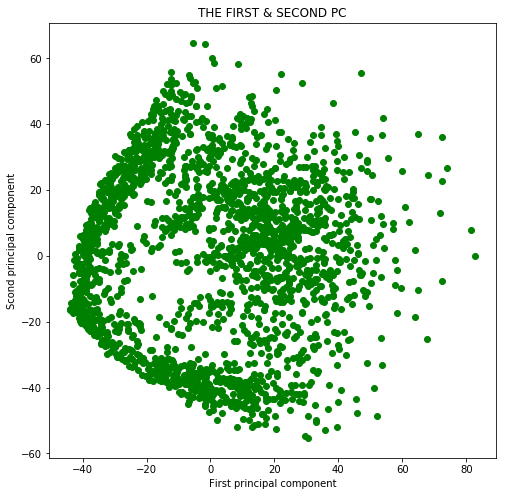

In [23]:
# Plot the first two Principal componets.....

import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(8,8))
plt.scatter(pca_30[:,0], pca_30[:,1],color='green', label="green")
# axis.plot(pca_30[:,0], pca_30[:,1], linewidth=0.7, color='black')
# axis.plot(pca_30[:,0], pca_30[:,1], linewidth=0.7, color='blue')
plt.xlabel('First principal component')
plt.ylabel('Scond principal component')
plt.title('THE FIRST & SECOND PC')

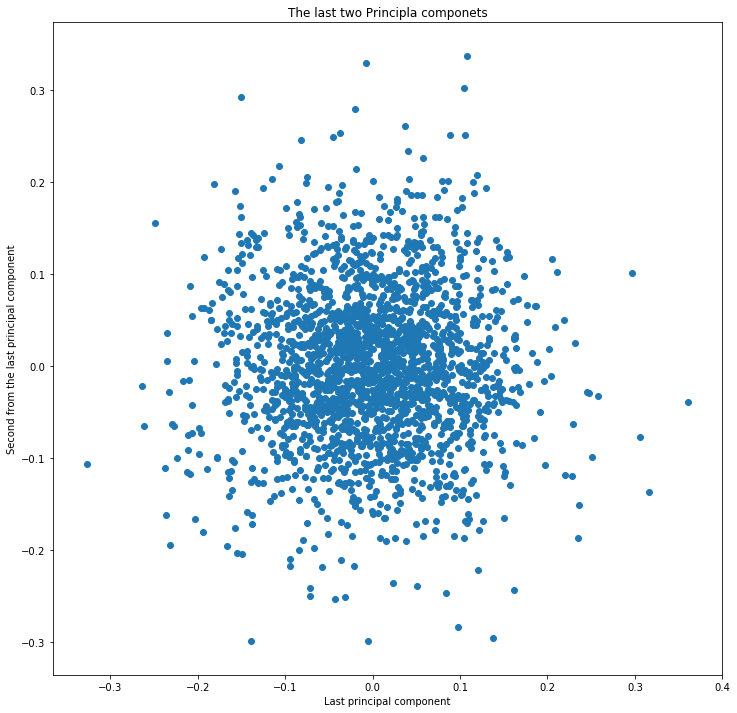

In [24]:
#The last two Principal Componets 

plt.figure(figsize=(12,12))
plt.scatter(pca_30[:,-3:-2], pca_30[:,-2:-1])
plt.xlabel('Last principal component')
plt.ylabel('Second from the last principal component')
plt.title('The last two Principla componets')

We can note that the first and second P.C have higher magnitude than and the last two P.C. In addition to that it can be noted from the plot, the first and second P.C tend to form cluster than the last two P.C.. 
In order to classify images we need eigenfaces with the smallest Euclidian distance from the input face.
Therefore we can be confident that the first few P.Cs can explain the image than the whole diamension.

### Divide the data to training and testing sets

In [25]:
X_train, X_test, y_train, y_test = train_test_split(pca_30, df_class,test_size=0.30, random_state=0)

In [26]:
X_train.shape, y_train.shape,X_test.shape,y_test.shape

((1516, 896), (1516,), (650, 896), (650,))

###  Let us take four classification methods and  compare the classification accuracy


Cross validation method is used as model selection with CV = 10 is used in all methods! 
This method divides the data into 10 equal parts and use one as a testing set and the other nine as training set ten times by changing the testing set each time. The results are shown as an array. To see the over all score from each CV we can take the average.

### 1. Naive Bayes

Naïve Bayes classifier is a probabilistic classifier based on Bayes’ theorem. It has a strong assumption of independence between features.

In [27]:
from sklearn.naive_bayes import GaussianNB
from sklearn.cross_validation import KFold, cross_val_score
k_fold = KFold(len(y_train), n_folds=10, shuffle=True, random_state=0)
model_1= GaussianNB()
model_1.fit(X_train,y_train)
print (cross_val_score(model_1, X_train, y_train, cv=k_fold, n_jobs=1))

C:\Users\Ashenafi\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


[ 0.72368421  0.72368421  0.73684211  0.67763158  0.70394737  0.69736842
  0.70198675  0.7218543   0.67549669  0.7615894 ]


### 2. SVM

SVM is a discriminative classifier by finding a hyper plane that maximizes the margin between classes. It is non- probabilistic classifier instead representation of features in space are mapped so that separate categories are divided by a clear gap. Thus, new features are then mapped into the same space and predicted to belong to a category based on which side of the gap the fall in to.

In [28]:
from sklearn.svm import SVC
k_fold = KFold(len(y_train), n_folds=10, shuffle=True, random_state=0)
model_2 = SVC()
model_2.fit(X_train,y_train)
print (cross_val_score(model_2, X_train, y_train, cv=k_fold, n_jobs=1))

[ 0.80921053  0.81578947  0.76973684  0.72368421  0.84868421  0.73684211
  0.7615894   0.80794702  0.73509934  0.79470199]


### 3. Logistic regression

Logistic Regression is statistical model on which the probability of an event is a linear combination of independent variables. Usually applies to binary variables but if we have a multi class case the algorithm uses one-vs-rest scheme.

In [29]:
from sklearn.linear_model import LogisticRegression
k_fold = KFold(len(y_train), n_folds=10, shuffle=True, random_state=0)
model_3 = LogisticRegression()
model_3.fit(X_train, y_train)
print (cross_val_score(model_3, X_train, y_train, cv=k_fold, n_jobs=1))

[ 0.97368421  0.97368421  0.95394737  0.95394737  0.95394737  0.96052632
  0.98675497  0.97350993  0.96688742  0.97350993]


### 4. KNN

KNN is a non-parametric (no assumption on the data distribution), lazy algorithm(no explicit training phase). The algorithm is based on features similarity. Similarity is measured with distance. An object is classified with the majority vote of its neighbours, with the object being assigned to the class most common among its k nearest neighbours.  

In [30]:
from sklearn.neighbors import KNeighborsClassifier
k_fold = KFold(len(y_train), n_folds=10, shuffle=True, random_state=0)
model_4 = KNeighborsClassifier(n_neighbors=5)
model_4.fit(X_train, y_train)
print (cross_val_score(model_4, X_train, y_train, cv=k_fold, n_jobs=1))

[ 0.56578947  0.63815789  0.60526316  0.50657895  0.625       0.57236842
  0.54304636  0.60264901  0.52317881  0.60927152]


According to the CV used the best result sofar is achived by Logistic regression.
now we can check the accuracy by the testing set which hasn't been used during the model selection process

In [31]:
print('Accuracy of the Naive Bayes: {:.2f}'.format(model_1.score(X_test, y_test)))
print('Accuracy of the SVM: {:.2f}'.format(model_2.score(X_test, y_test)))
print('Accuracy of the Logistic regression: {:.2f}'.format(model_3.score(X_test, y_test)))
print('Accuracy of the KNN: {:.2f}'.format(model_4.score(X_test, y_test)))

Accuracy of the Naive Bayes: 0.68
Accuracy of the SVM: 0.81
Accuracy of the Logistic regression: 0.97
Accuracy of the KNN: 0.62


### Confusion matrix for SVM

In [32]:
y_pred_2 = model_2.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix_2 = confusion_matrix(y_test, y_pred_2)
print(confusion_matrix_2)

[[12  0  3 ...,  1  0  0]
 [ 0 14  0 ...,  0  0  0]
 [ 0  0 14 ...,  0  0  0]
 ..., 
 [ 0  0  0 ..., 12  2  0]
 [ 0  0  0 ...,  0  9  0]
 [ 0  0  1 ...,  0  0 16]]


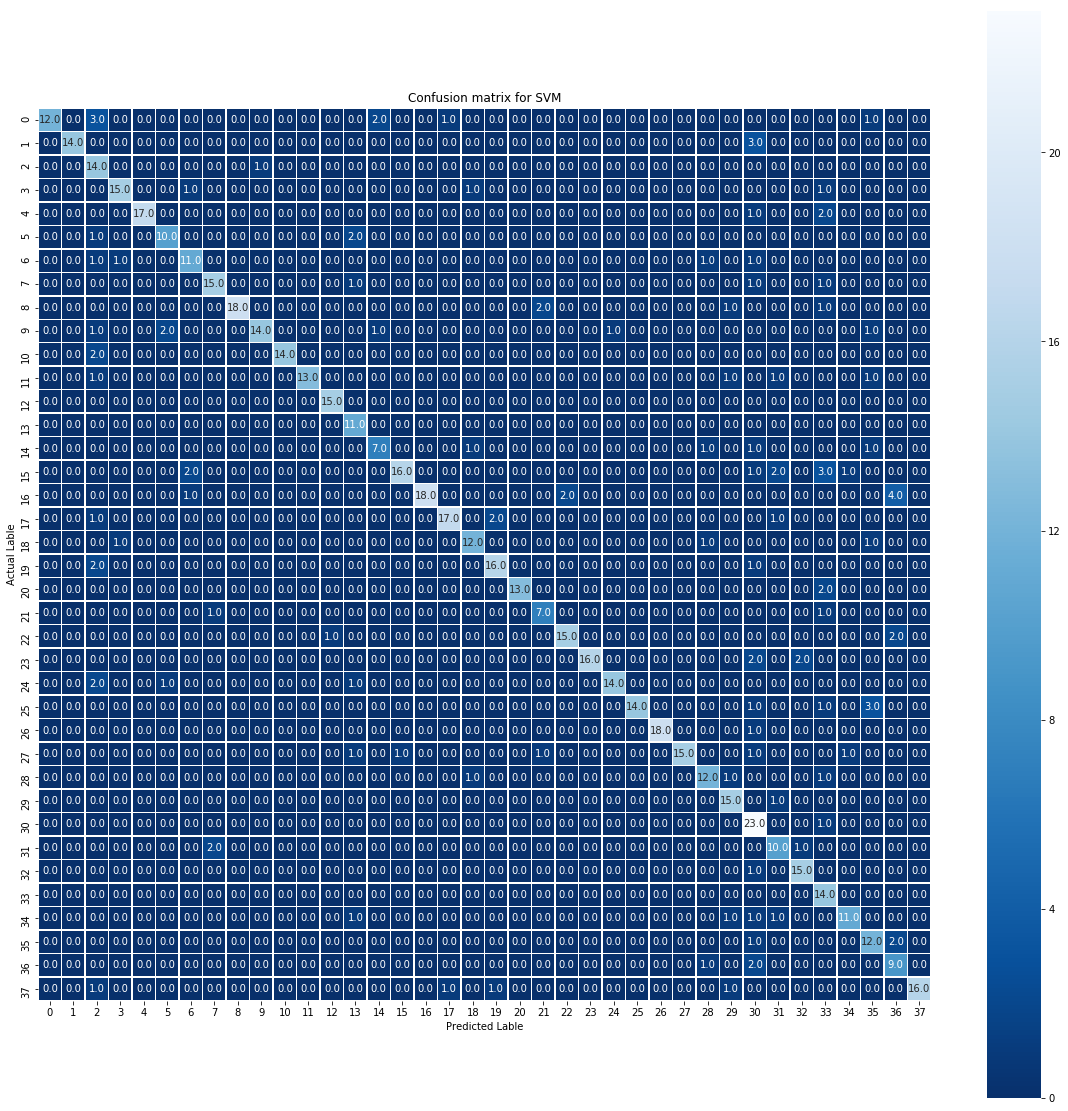

In [33]:
import seaborn as sns
plt.figure(figsize = (20,20))
sns.heatmap(confusion_matrix_2, annot= True, fmt = ".1f", linewidths= .5, square=True, cmap= 'Blues_r')
plt.ylabel('Actual Lable')
plt.xlabel('Predicted Lable')
plt.title('Confusion matrix for SVM')

### Confusion matrix for Logistic Regression

In [34]:
y_pred_3 = model_3.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix_3 = confusion_matrix(y_test, y_pred_3)
print(confusion_matrix_3)

[[19  0  0 ...,  0  0  0]
 [ 0 15  0 ...,  0  0  0]
 [ 0  0 14 ...,  0  0  0]
 ..., 
 [ 0  0  0 ..., 15  0  0]
 [ 0  0  0 ...,  0 12  0]
 [ 0  0  0 ...,  0  0 20]]


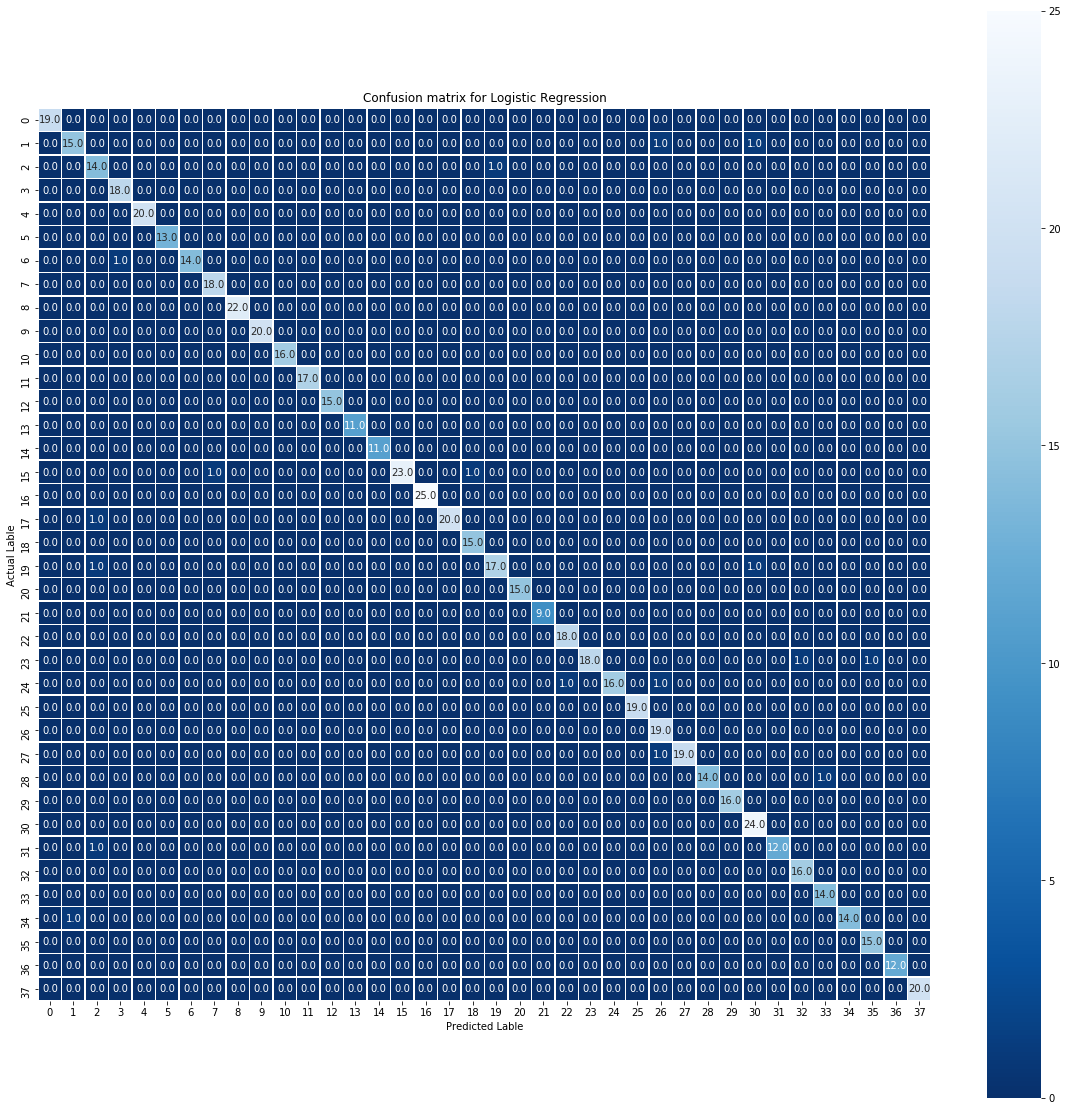

In [35]:
import seaborn as sns
plt.figure(figsize = (20,20))
sns.heatmap(confusion_matrix_3, annot= True, fmt = ".1f", linewidths= .5, square=True, cmap= 'Blues_r')
plt.ylabel('Actual Lable')
plt.xlabel('Predicted Lable')
plt.title('Confusion matrix for Logistic Regression')

As we can see the SVM (81%) and Logistic regression (97%) gave relatively good prediction, especially the logistic regression gave an excellent result.
The miss-classified results are seen in the non-diagonal parts
For example, the confusion matrix of the logistic regression shows, gird 34(person 35), out of 15 testing examples 14 are predicted right and one testing sample is classified as grid 1(person 2)
